Running for DECIMAL Scaler
Classes: [0 1 2 3]

==================== Running experiment for 60% train split ====================
Resampling method: ADASYN. New training shape: (806117, 24)

Epoch 1/10
5354/5354 ━━━━━━━━━━━━━━━━━━━━ 139s 24ms/step - accuracy: 0.4141 - loss: 1.1997 - val_accuracy: 1.4886e-04 - val_loss: 1.6966
Epoch 2/10
5354/5354 ━━━━━━━━━━━━━━━━━━━━ 205s 38ms/step - accuracy: 0.5816 - loss: 0.9786 - val_accuracy: 0.5897 - val_loss: 1.4994
Epoch 3/10
5354/5354 ━━━━━━━━━━━━━━━━━━━━ 205s 38ms/step - accuracy: 0.6576 - loss: 0.8818 - val_accuracy: 0.6789 - val_loss: 1.4234
Epoch 4/10
5354/5354 ━━━━━━━━━━━━━━━━━━━━ 200s 37ms/step - accuracy: 0.6839 - loss: 0.8382 - val_accuracy: 0.7557 - val_loss: 1.3414
Epoch 5/10
5354/5354 ━━━━━━━━━━━━━━━━━━━━ 214s 40ms/step - accuracy: 0.7009 - loss: 0.8081 - val_accuracy: 0.7719 - val_loss: 1.3054
Epoch 6/10
5354/5354 ━━━━━━━━━━━━━━━━━━━━ 223s 42ms/step - accuracy: 0.7096 - loss: 0.7898 - val_accuracy: 0.7687 - val_loss: 1.3066
Epoch 7/1

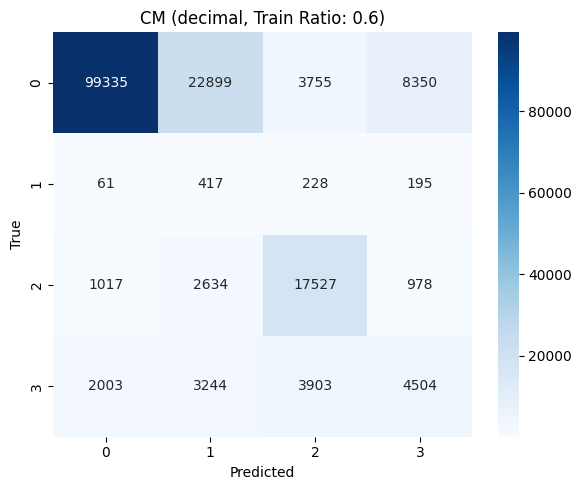

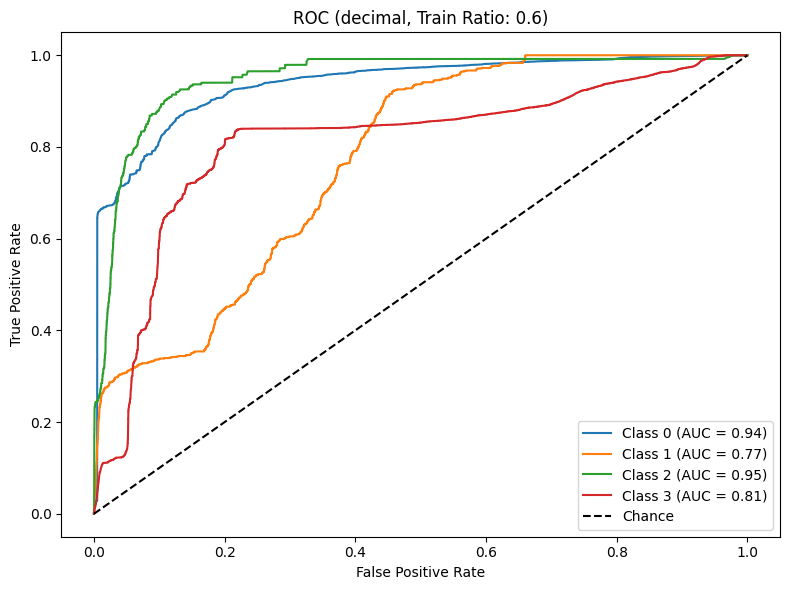


RESULTS FOR 60% SPLIT:
----------------------------------------
Accuracy: 0.7120, Precision: 0.8768, Recall: 0.7120, F1: 0.7806, ROC AUC: 0.8667
Runtime: 2308.405 s, Peak RAM: 1246.54 MB

Classification Report:
              precision    recall  f1-score   support

           0     0.9699    0.7394    0.8391    134339
           1     0.0143    0.4628    0.0277       901
           2     0.6897    0.7911    0.7369     22156
           3     0.3211    0.3299    0.3254     13654

    accuracy                         0.7120    171050
   macro avg     0.4987    0.5808    0.4823    171050
weighted avg     0.8768    0.7120    0.7806    171050


==================== Running experiment for 70% train split ====================
Resampling method: ADASYN. New training shape: (939662, 24)
Epoch 1/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 287s 45ms/step - accuracy: 0.4594 - loss: 1.1476 - val_accuracy: 0.0011 - val_loss: 1.6180
Epoch 2/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 360s 51ms/step - accuracy: 0.5763 - 

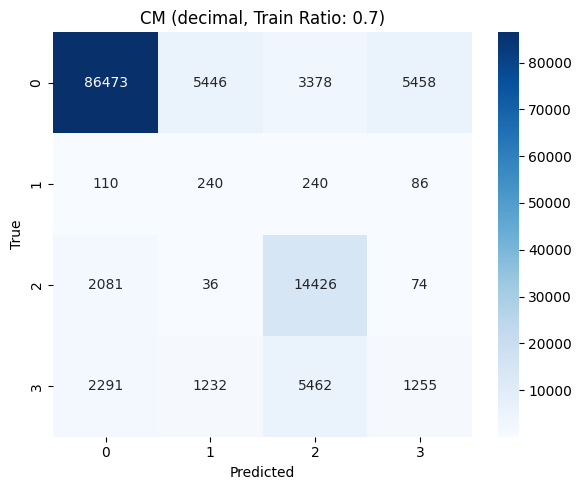

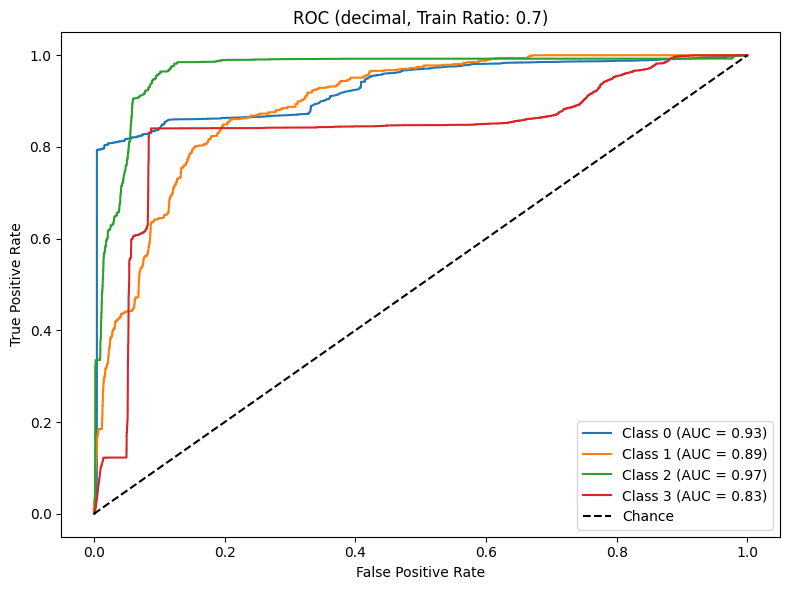


RESULTS FOR 70% SPLIT:
----------------------------------------
Accuracy: 0.7982, Precision: 0.8409, Recall: 0.7982, F1: 0.8137, ROC AUC: 0.9057
Runtime: 6208.475 s, Peak RAM: 1014.72 MB

Classification Report:
              precision    recall  f1-score   support

           0     0.9507    0.8583    0.9021    100755
           1     0.0345    0.3550    0.0629       676
           2     0.6137    0.8681    0.7191     16617
           3     0.1826    0.1226    0.1467     10240

    accuracy                         0.7982    128288
   macro avg     0.4454    0.5510    0.4577    128288
weighted avg     0.8409    0.7982    0.8137    128288


==================== Running experiment for 80% train split ====================
Resampling method: ADASYN. New training shape: (1074892, 24)
Epoch 1/10
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 1620s 223ms/step - accuracy: 0.4798 - loss: 1.1139 - val_accuracy: 0.7406 - val_loss: 1.4230
Epoch 2/10
7138/7138 ━━━━━━━━━━━━━━━━━━━━ 1025s 143ms/step - accuracy: 0.67

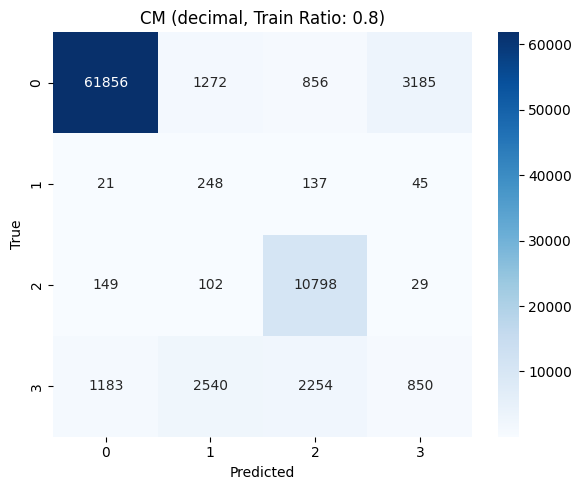

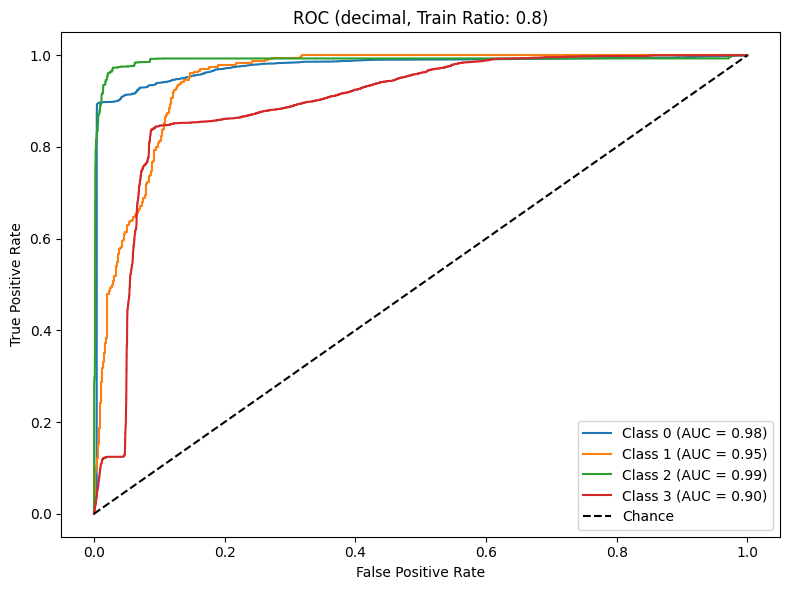


RESULTS FOR 80% SPLIT:
----------------------------------------
Accuracy: 0.8623, Precision: 0.8850, Recall: 0.8623, F1: 0.8695, ROC AUC: 0.9521
Runtime: 14652.022 s, Peak RAM: 1253.47 MB

Classification Report:
              precision    recall  f1-score   support

           0     0.9786    0.9209    0.9489     67169
           1     0.0596    0.5499    0.1075       451
           2     0.7688    0.9747    0.8596     11078
           3     0.2069    0.1245    0.1554      6827

    accuracy                         0.8623     85525
   macro avg     0.5035    0.6425    0.5179     85525
weighted avg     0.8850    0.8623    0.8695     85525


✅ All ratios complete. Final summary for decimal saved to outputs_decimal_adasyn\metrics_summary_decimal.csv:
 Scaler  Train Ratio  Accuracy  Precision  Recall  F1-Score  ROC AUC  Runtime (s)  RAM Used (MB)
decimal       0.6000    0.7120     0.8768  0.7120    0.7806   0.8667    2308.4052      1246.5430
decimal       0.7000    0.7982     0.8409  0.79

In [ ]:
import os
import time
import math
import threading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
)

# Imblearn for ADASYN
from imblearn.over_sampling import ADASYN, RandomOverSampler

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models

# Psutil for RAM tracking
try:
    import psutil
    _PSUTIL_AVAILABLE = True
except ImportError:
    _PSUTIL_AVAILABLE = False

# ================== CONFIGURATION ==================
ALL_DATA = Path(r"C:\Users\deepa\OneDrive\Desktop\Research\GNN\ADASYN\all_three.csv")
OUT_DIR = Path("./outputs_decimal_adasyn"); OUT_DIR.mkdir(parents=True, exist_ok=True)

# Set to one of: "decimal", "minmax", "robust", "standard"
SCALER_NAME = "decimal"

TARGET_COL = "label"
SEED = 42
EPOCHS = 10
BATCH_SIZE = 128
TRAIN_RATIOS = [0.6, 0.7, 0.8]

np.random.seed(SEED)
tf.random.set_seed(SEED)

# ================== SCALERS & HELPERS ==================
class DecimalScaler:
    """Scales each feature x_j by 10^ceil(log10(max|x_j|)) -> values in (-1,1)."""
    def fit(self, X):
        m = np.maximum(np.max(np.abs(X), axis=0), 1e-12)
        self.j_ = np.ceil(np.log10(m)).astype(np.float32)
        return self
    def transform(self, X):
        denom = (10.0 ** self.j_)
        return X / denom
    def fit_transform(self, X):
        return self.fit(X).transform(X)

def get_scaler(name):
    nm = name.lower()
    if nm == 'decimal': return DecimalScaler()
    if nm == 'minmax': return MinMaxScaler()
    if nm == 'robust': return RobustScaler(quantile_range=(25.0, 75.0))
    if nm == 'standard': return StandardScaler()
    raise ValueError('Unknown scaler: ' + str(name))

def apply_adasyn_safe(X, y):
    """ADASYN with safe fallback to ROS when minority count is too small or ADASYN fails."""
    try:
        counts = pd.Series(y).value_counts()
        if counts.min() < 6:
            ros = RandomOverSampler(random_state=SEED)
            return ros.fit_resample(X, y), f'RandomOverSampler(fallback, min_class_count={counts.min()})'
        else:
            adasyn = ADASYN(random_state=SEED)
            return adasyn.fit_resample(X, y), 'ADASYN'
    except Exception as e:
        ros = RandomOverSampler(random_state=SEED)
        return ros.fit_resample(X, y), f'ROS(fallback):{str(e)}'

# RAM Monitoring Class
class PeakRSS:
    def __enter__(self):
        self.max_rss = None; self._stop = False
        if _PSUTIL_AVAILABLE:
            self._proc = psutil.Process(os.getpid())
            self.max_rss = self._proc.memory_info().rss
            def _poll():
                while not self._stop:
                    try:
                        rss = self._proc.memory_info().rss
                        if rss is not None and (self.max_rss is None or rss > self.max_rss): self.max_rss = rss
                    except Exception: pass
                    time.sleep(0.2)
            self._t = threading.Thread(target=_poll, daemon=True); self._t.start()
        return self
    def __exit__(self, exc_type, exc, tb):
        if _PSUTIL_AVAILABLE:
            self._stop = True
            try: self._t.join(timeout=1.0)
            except Exception: pass

# ================== PLOTTING ==================
def plot_confusion_matrix(cm, class_names, outpath, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout()
    plt.savefig(outpath)
    plt.show()

def plot_roc(y_true, y_probs, class_names, outpath, title="ROC Curve"):
    try:
        y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
        plt.figure(figsize=(8, 6))
        for i, c in enumerate(class_names):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {c} (AUC = {auc_score:.2f})")
        plt.plot([0, 1], [0, 1], "k--", label="Chance")
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.title(title); plt.legend(loc="lower right"); plt.tight_layout()
        plt.savefig(outpath)
        plt.show()
    except Exception as e:
        print("ROC plotting failed:", e)

# ================== SIMPLE GNN LAYERS (fixed) ==================
def make_feature_chain_adj(n_features: int):
    A = np.zeros((n_features, n_features), dtype=np.float32)
    for i in range(n_features):
        A[i, i] = 1.0
        if i - 1 >= 0: A[i, i-1] = 1.0
        if i + 1 < n_features: A[i, i+1] = 1.0
    d = np.sum(A, axis=1)
    d_inv_sqrt = 1.0 / np.sqrt(np.maximum(d, 1e-12))
    D_inv_sqrt = np.diag(d_inv_sqrt.astype(np.float32))
    A_hat = D_inv_sqrt @ A @ D_inv_sqrt
    return A_hat.astype(np.float32)

class GraphConv(layers.Layer):
    """
    H = act(Â X W + b)
    Â: (n, n) fixed normalized adjacency over features (with self-loops)
    X: (batch, n, in_ch)
    """
    def __init__(self, A_hat: np.ndarray, units: int, activation="relu", **kwargs):
        super().__init__(**kwargs)
        # Keep a constant with the layer's dtype for matmul
        self.units = int(units)
        self.activation = tf.keras.activations.get(activation)
        self._A_hat_np = A_hat  # stash numpy, build as tf.constant with correct dtype later

    def build(self, input_shape):
        # input_shape: (batch, n, in_ch)
        in_ch = int(input_shape[-1])
        # make A_hat constant with the same dtype as the layer
        self.A_hat = tf.constant(self._A_hat_np, dtype=self.dtype if self.dtype is not None else tf.float32)
        self.kernel = self.add_weight(
            name="kernel",
            shape=(in_ch, self.units),
            dtype=self.dtype if self.dtype is not None else tf.float32,
            initializer="glorot_uniform",
            trainable=True,
        )
        self.bias = self.add_weight(
            name="bias",
            shape=(self.units,),
            dtype=self.dtype if self.dtype is not None else tf.float32,
            initializer="zeros",
            trainable=True,
        )

    def call(self, X):
        # X: (batch, n, in_ch)
        # Propagate across nodes: (n,n) • (b,n,in_ch) -> (b,n,in_ch)
        H = tf.einsum('ij,bjk->bik', self.A_hat, X)
        # Linear transform: (b,n,in_ch) • (in_ch, units) -> (b,n,units)
        H = tf.matmul(H, self.kernel)
        H = tf.nn.bias_add(H, self.bias)
        return self.activation(H)

def build_gnn_single(n_features: int, num_classes: int):
    A_hat = make_feature_chain_adj(n_features)
    # Force a consistent float dtype
    f32 = tf.float32

    inp = layers.Input(shape=(n_features, 1), dtype=f32)
    x = GraphConv(A_hat, units=64, activation="relu", dtype=f32)(inp)
    x = layers.Dropout(0.15)(x)
    x = GraphConv(A_hat, units=64, activation="relu", dtype=f32)(x)
    x = layers.Dropout(0.15)(x)

    x = layers.GlobalAveragePooling1D()(x)

    if num_classes > 2:
        out = layers.Dense(num_classes, activation="softmax", dtype=f32)(x)
        loss = "sparse_categorical_crossentropy"
    else:
        out = layers.Dense(1, activation="sigmoid", dtype=f32)(x)
        loss = "binary_crossentropy"

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=loss, metrics=["accuracy"])
    return model

# ================== 1. LOAD & PREPROCESS DATA ==================
df = pd.read_csv(ALL_DATA)
df = df.dropna(subset=[TARGET_COL])

X_features = df.drop(columns=[TARGET_COL]).apply(pd.to_numeric, errors='coerce')
y_labels = df[TARGET_COL].values

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_features)

le = LabelEncoder()
y_encoded = le.fit_transform(y_labels)
classes = np.unique(y_encoded)
class_names = [str(c) for c in classes]
print(f"Running for {SCALER_NAME.upper()} Scaler\nClasses: {classes}")

# ================== 2. RUN EXPERIMENTS FOR EACH RATIO ==================
results = []
for ratio in TRAIN_RATIOS:
    print(f"\n{'='*20} Running experiment for {ratio*100:.0f}% train split {'='*20}")

    # --- Data Preparation ---
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_imputed, y_encoded, train_size=ratio, stratify=y_encoded, random_state=SEED
    )
    scaler = get_scaler(SCALER_NAME)
    X_tr_s = scaler.fit_transform(X_tr)
    X_te_s = scaler.transform(X_te)

    # --- Oversampling with ADASYN (train only) ---
    (X_tr_res, y_tr_res), resample_note = apply_adasyn_safe(X_tr_s, y_tr)
    print(f'Resampling method: {resample_note}. New training shape: {X_tr_res.shape}')

    # --- Reshape Data for Single-GNN ---
    # Each sample -> (n_features, 1 channel) so GNN runs across feature graph
    n_feats = X_tr_res.shape[1]
    X_train_model = X_tr_res.reshape((-1, n_feats, 1))
    X_test_model  = X_te_s.reshape((-1, n_feats, 1))

    # --- Build, Train, Predict ---
    model = build_gnn_single(n_features=n_feats, num_classes=len(classes))
    start_time = time.perf_counter()
    with PeakRSS() as mem_monitor:
        model.fit(X_train_model, y_tr_res, validation_split=0.15,
                  epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
        if len(classes) > 2:
            probs = model.predict(X_test_model, verbose=0)
            preds = np.argmax(probs, axis=1)
        else:
            probs_bin = model.predict(X_test_model, verbose=0).ravel()
            probs = np.stack([1.0 - probs_bin, probs_bin], axis=1)
            preds = (probs_bin >= 0.5).astype(int)
    runtime_sec = time.perf_counter() - start_time
    ram_used_mb = (mem_monitor.max_rss / (1024**2)) if (_PSUTIL_AVAILABLE and mem_monitor.max_rss is not None) else float("nan")

    # --- Metrics ---
    accuracy = accuracy_score(y_te, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(y_te, preds, average='weighted', zero_division=0)
    try:
        roc_auc = roc_auc_score(y_te, probs, multi_class="ovr" if len(classes) > 2 else "raise")
    except Exception:
        roc_auc = float("nan")

    # --- Plots ---
    print("\nGenerating plots...")
    cm = confusion_matrix(y_te, preds)
    cm_path  = OUT_DIR / f'cm_{SCALER_NAME}_split_{int(ratio*100)}.png'
    roc_path = OUT_DIR / f'roc_{SCALER_NAME}_split_{int(ratio*100)}.png'
    plot_confusion_matrix(cm, class_names, cm_path, f'CM ({SCALER_NAME}, Train Ratio: {ratio})')
    plot_roc(y_te, probs, class_names, roc_path, f'ROC ({SCALER_NAME}, Train Ratio: {ratio})')

    # --- Store & Report ---
    metrics = {
        'Scaler': SCALER_NAME,
        'Train Ratio': ratio,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Runtime (s)': runtime_sec,
        'RAM Used (MB)': ram_used_mb
    }
    results.append(metrics)

    print(f"\nRESULTS FOR {int(ratio*100)}% SPLIT:")
    print("-" * 40)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    print(f"Runtime: {runtime_sec:.3f} s, Peak RAM: {ram_used_mb:.2f} MB")
    print("\nClassification Report:")
    print(classification_report(y_te, preds, digits=4))

# ================== 3. SAVE FINAL SUMMARY ==================
summary_df = pd.DataFrame(results)
summary_df_path = OUT_DIR / f'metrics_summary_{SCALER_NAME}.csv'
summary_df.to_csv(summary_df_path, index=False)
print(f"\n✅ All ratios complete. Final summary for {SCALER_NAME} saved to {summary_df_path}:")
print(summary_df.to_string(index=False, float_format=lambda x: f'{x:.4f}'))
